## Jupyter notebook for plotting Supplementary Fig. 10d

This notebook is the code for plotting histograms of CHi-C changes at  ATAC-seq peak sites binding with transcription factors including CTCF, H3K27ac, NFAT1, NFKB and JunB (Supplementary Fig. 10d) as illustrated in the paper **\"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis\"** by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*

Author : *Jing Yang*  <br />
Date: 01-05-2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [1]:

library(tidyverse)
library(reshape2)
library(gridExtra)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
ATACseq_clustered <- read.csv('data/ATACseq_withcluster.txt', header=T)

In [3]:
linked_data <- read.table('data/ATACseq_CHiC_RNAseq_linked_withpromoter.txt', header=T)

In [4]:
head(ATACseq_clustered)
head(linked_data)

,chr,start,end,width,T0,T20,T60,T2H,T4H,T24H,LR,Cluster
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,chr10,100148537,100149145,609,6.308615,5.997314,6.371118,7.022634,8.320145,8.144691,-3.96546,0
2,chr10,101161833,101162364,532,7.338236,6.947811,6.958460,6.880832,6.679306,7.082866,-1.17149,5
3,chr10,101397063,101397480,418,6.607202,6.798536,6.333778,6.111942,5.572420,5.077424,-7.06772,3
4,chr10,101442197,101442458,262,5.683413,5.564784,6.187952,6.186169,6.197164,6.004235,-1.06531,0
5,chr10,101467306,101467557,252,5.652996,6.205735,6.295447,6.137111,5.847167,5.681351,-4.30695,1
6,chr10,101495356,101495528,173,5.345845,4.133203,4.219080,4.517889,4.446034,5.220124,-1.25567,5


,ATACchr,ATACstart,ATACend,otherEndID,otherEndchr,otherEndstart,otherEndend,ID,ENSG,ENSGchr,⋯,AT24H,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,BIC_atacseq,LR_atacseq,BIC_chic,LR_chic,BIC_gene,LR_gene
,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10,100168185,100168481,94270,chr10,100168142,100171879,7,ENSG00000122873,chr10,⋯,5.469091,-0.02766343,-0.6566466,0.40509823,1.791775,1.592097e-05,-12.8871761,-14.678936,-26.597466,-28.38923
2,chr10,100168185,100168481,94270,chr10,100168142,100171879,7,ENSG00000099204,chr10,⋯,5.469091,-0.17224216,0.3875610,-0.94088541,1.791775,1.592097e-05,NA,NA,-24.557846,-26.34961
3,chr10,100267287,100268052,94301,chr10,100265170,100287223,11,ENSG00000052749,chr10,⋯,7.668432,0.44611006,-0.6853788,-0.07828185,0.991704,-8.000554e-01,-7.9748306,-9.766590,-8.869815,-10.66157
4,chr10,100286005,100287018,94301,chr10,100265170,100287223,12,ENSG00000052749,chr10,⋯,8.877224,0.32658687,-0.8226653,-0.07828185,1.791826,6.613878e-05,-7.9748306,-9.766590,-8.869815,-10.66157
5,chr10,100481544,100482916,94352,chr10,100476882,100482954,21,ENSG00000213341,chr10,⋯,8.877224,-0.42433344,0.5799938,-0.78392100,1.791772,1.285027e-05,0.3829118,-1.408848,-14.956021,-16.74778
6,chr10,100508684,100509527,94364,chr10,100507722,100518706,22,ENSG00000052749,chr10,⋯,8.168356,0.48036294,-0.3392329,0.36504680,1.791769,9.747732e-06,NA,NA,-8.869815,-10.66157


In [5]:
dim(linked_data)

[1] 76914    66

In [6]:
ATACseq_idx <- c('ATACchr','ATACstart','ATACend','AT0','AT20','AT1H','AT2H','AT4H','AT24H')

In [7]:
names(ATACseq_clustered) <- c('ATACchr','ATACstart','ATACend','width','AT0','AT20','AT1H','AT2H','AT4H','AT24H','ALR','ATACCluster')

In [8]:
linked_data_withATACcluster <- unique(merge(linked_data, ATACseq_clustered))

### read ATACseq peak locations intersected with H3K427AC, NFAT, NFKB and CTCF

In [9]:

ATACseq_with_TF <- fread('data/ATACseq_peak_intersect_with_H3K27AC_NFAT_NFKB_CTCF_singleoccupiedonly.bed',header=F, sep='\t')

In [10]:
head(ATACseq_with_TF)

V1,V2,V3,V4
<chr>,<int>,<int>,<chr>
chr1,984284,984405,CTCF
chr1,1040483,1040896,CTCF
chr1,1069266,1069663,CTCF
chr1,1079475,1080236,H3K27AC
chr1,1098916,1099911,JunB
chr1,1371341,1372275,CTCF


In [11]:
names(ATACseq_with_TF) <- c('ATACchr','ATACstart','ATACend','TF')

In [12]:
merged_data <- unique(merge(linked_data_withATACcluster, ATACseq_with_TF, all=TRUE))

In [13]:
head(merged_data)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,otherEndID,⋯,BIC_atacseq,LR_atacseq,BIC_chic,LR_chic,BIC_gene,LR_gene,width,ALR,ATACCluster,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,chr1,984284,984405,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
2,chr1,1040483,1040896,7.900938,7.986564,7.931974,7.621835,7.503944,7.269499,248,⋯,-2.969029,-4.760788,1.79200,0.0002405170,-17.527654,-19.319414,414,-4.76079,3,CTCF
3,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,251,⋯,-3.176320,-4.968079,NA,NA,-5.409763,-7.201523,214,-4.96808,3,NA
4,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,251,⋯,-3.176320,-4.968079,NA,NA,-28.686864,-30.478623,214,-4.96808,3,NA
5,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,251,⋯,-3.176320,-4.968079,1.79189,0.0001305548,-17.527654,-19.319414,214,-4.96808,3,NA
6,chr1,1069266,1069663,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF


In [14]:
merged_data$TF[is.na(merged_data$TF)] <- 'Others'

In [15]:
dim(merged_data)
table(merged_data$TF)

[1] 11901    70


   CTCF H3K27AC    JunB   NFAT1   NFAT2    NFKB  Others 
   2697    1143    2358     163       7      67    5466 

In [16]:
merged_data_new <- merged_data[complete.cases(merged_data),]

In [17]:
head(merged_data_new)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,otherEndID,⋯,BIC_atacseq,LR_atacseq,BIC_chic,LR_chic,BIC_gene,LR_gene,width,ALR,ATACCluster,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
2,chr1,1040483,1040896,7.900938,7.986564,7.931974,7.621835,7.503944,7.269499,248,⋯,-2.969029,-4.760788,1.792000,0.0002405170,-17.52765,-19.31941,414,-4.76079,3,CTCF
5,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,251,⋯,-3.176320,-4.968079,1.791890,0.0001305548,-17.52765,-19.31941,214,-4.96808,3,Others
9,chr1,1143885,1144665,7.874818,7.813425,7.740767,7.821349,7.422338,7.236295,260,⋯,-0.138466,-1.930225,1.792516,0.0007567438,-20.53857,-22.33033,781,-1.93023,3,Others
11,chr1,1143885,1144665,7.874818,7.813425,7.740767,7.821349,7.422338,7.236295,260,⋯,-0.138466,-1.930225,-7.549345,-9.3411049677,-17.52765,-19.31941,781,-1.93023,3,Others
12,chr1,1143885,1144665,7.874818,7.813425,7.740767,7.821349,7.422338,7.236295,260,⋯,-0.138466,-1.930225,1.792516,0.0007567438,-20.07642,-21.86818,781,-1.93023,3,Others
15,chr1,1371341,1372275,8.926809,9.115807,8.768041,8.604699,8.561614,8.197402,278,⋯,-2.860340,-4.652099,1.149975,-0.6417841593,-16.17891,-17.97067,935,-4.65210,3,CTCF


In [18]:
dim(merged_data_new)

[1] 5249   70

In [19]:
idx_uniq <- c('baitID','otherEndID','T0','T20','T1H','T4H','T24H','TF')

In [20]:
merged_cluster0_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==0)[,idx_uniq])
merged_cluster1_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==1)[,idx_uniq])
merged_cluster2_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==2)[,idx_uniq])
merged_cluster3_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==3)[,idx_uniq])
merged_cluster4_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==4)[,idx_uniq])
merged_cluster5_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==5)[,idx_uniq])


In [21]:
dim(merged_cluster0_withTF)

[1] 1702    8

In [22]:
idx_chic <- c('T0','T20','T1H','T4H','T24H')

In [23]:
data0 <- data.frame(dynamic=sign(merged_cluster0_withTF$T24H-merged_cluster0_withTF$T0), TF=merged_cluster0_withTF$TF)
data1 <- data.frame(dynamic=sign(merged_cluster1_withTF$T24H-merged_cluster1_withTF$T0), TF=merged_cluster1_withTF$TF)
data2 <- data.frame(dynamic=sign(merged_cluster2_withTF$T24H-merged_cluster2_withTF$T0), TF=merged_cluster2_withTF$TF)
data3 <- data.frame(dynamic=sign(merged_cluster3_withTF$T24H-merged_cluster3_withTF$T0), TF=merged_cluster3_withTF$TF)
data4 <- data.frame(dynamic=sign(merged_cluster4_withTF$T24H-merged_cluster4_withTF$T0), TF=merged_cluster4_withTF$TF)
data5 <- data.frame(dynamic=sign(merged_cluster5_withTF$T24H-merged_cluster5_withTF$T0), TF=merged_cluster5_withTF$TF)
data0$label <- 1:dim(data0)[1]
data0$cluster <- 'Cluster 1'
data1$label <- 1:dim(data1)[1]
data1$cluster <- 'Cluster 2'
data2$label <- 1:dim(data2)[1]
data2$cluster <- 'Cluster 3'
data3$label <- 1:dim(data3)[1]
data3$cluster <- 'Cluster 4'
data4$label <- 1:dim(data4)[1]
data4$cluster <- 'Cluster 5'
data5$label <- 1:dim(data5)[1]
data5$cluster <- 'Cluster 6'

In [24]:
data_forplot <- rbind(data0, data1, data2, data3, data4, data5)

In [25]:
data_forplot$dynamic_symbol <- 'Gain'
data_forplot$dynamic_symbol[data_forplot$dynamic==(-1)] <- 'Lost'
data_forplot$dynamic_symbol[data_forplot$dynamic==0] <- 'No Change'

Saving 6.67 x 6.67 in image



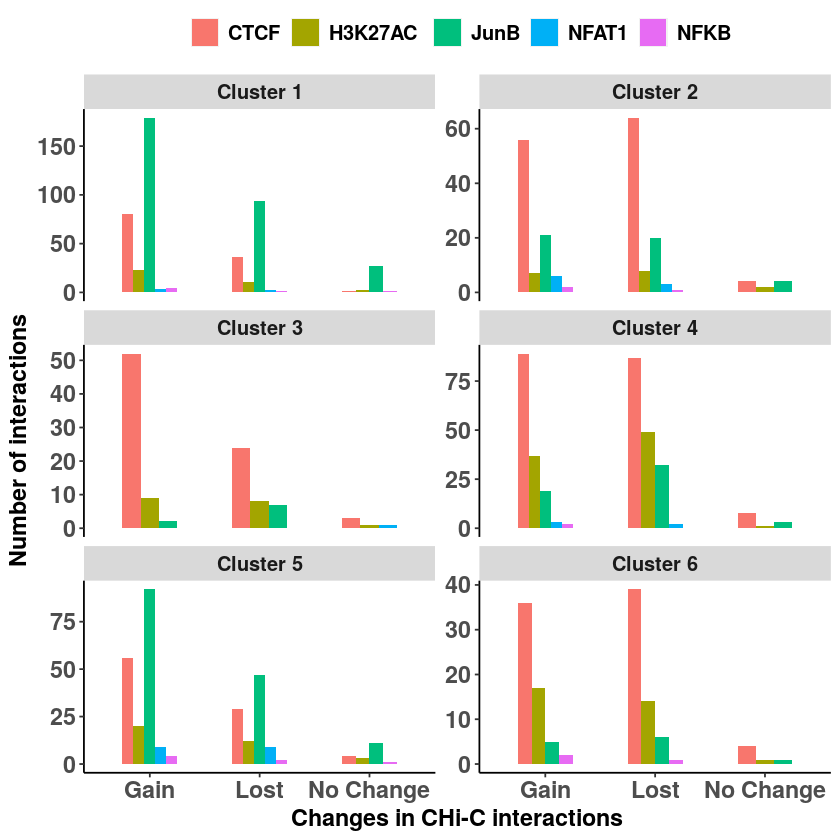

In [26]:

p0 <- ggplot(subset(data_forplot, !(data_forplot$TF %in% 'Others')), aes(x=dynamic_symbol, fill=TF)) + 
geom_bar(width=0.5, position = "dodge") + xlab('Changes in CHi-C interactions') +
theme(panel.background=element_blank(), 
         axis.line=element_line(),
         axis.text=element_text(size=14, face='bold'),axis.title=element_text(size=14,face="bold"),
        strip.text = element_text(size=12, face='bold'),
        legend.text=element_text(size=12, face='bold'), plot.title=element_text(size=16, face="bold", hjust=0.5),
        legend.position='top', legend.title=element_blank()) + 
        ylab('Number of interactions') + #ggtitle('Supplementary Fig. 10d') +
   facet_wrap(cluster~., ncol=2, scales="free_y")

#ggsave('~/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_motif/CTCF_H3K27AC_NFAT_withincluster_new.pdf', p0)
p0